# Assignment 4: Feature points, matching, homography


## Exercise 1: Feature points detectors
In this exercise you will implement two frequently used feature point detectors: the Hessian
algorithm and the Harris algorithm.

In [16]:
#imports
import numpy as np
from matplotlib import pyplot as plt
from a4_utils import *
import cv2 as cv2
from UZ_utils import *
import math
import os

### A)
Implement a function hessian_points, that computes a Hessian determinant using
the equation for each pixel of the input image. As this computation can be
very slow if done pixel by pixel, you have to implement it using vector operations
(without explicit for loops). Test the function using image from test_points.jpg
as your input (do not forget to convert it to grayscale) and visualize the result.


In [19]:
def get_image_derivetive(image, sigma):
    gaus = np.array(gauss(sigma))

    gaus_dx = np.array(gaussdx(sigma))
    gaus_dx = np.flip(gaus_dx)

    I_x = cv2.filter2D(image, -1, gaus.T)
    I_x = cv2.filter2D(I_x, -1, gaus_dx)

    I_y = cv2.filter2D(image, -1, gaus)
    I_y = cv2.filter2D(I_y, -1, gaus_dx.T)

    return I_x, I_y


def get_second_image_derivative(image, sigma):
    gaus = np.array(gauss(sigma))
    gaus_dx = np.array(gaussdx(sigma))
    gaus_dx = np.flip(gaus_dx)

    I_x, I_y = get_image_derivetive(image, sigma)

    I_xx = cv2.filter2D(I_x, -1, gaus.T)
    I_xx = cv2.filter2D(I_xx, -1, gaus_dx)

    I_yy = cv2.filter2D(I_y, -1, gaus)
    I_yy = cv2.filter2D(I_yy, -1, gaus_dx.T)

    I_xy = cv2.filter2D(I_x, -1, gaus)
    I_xy = cv2.filter2D(I_xy, -1, gaus_dx.T)

    return I_xx, I_yy, I_xy

1
2
3


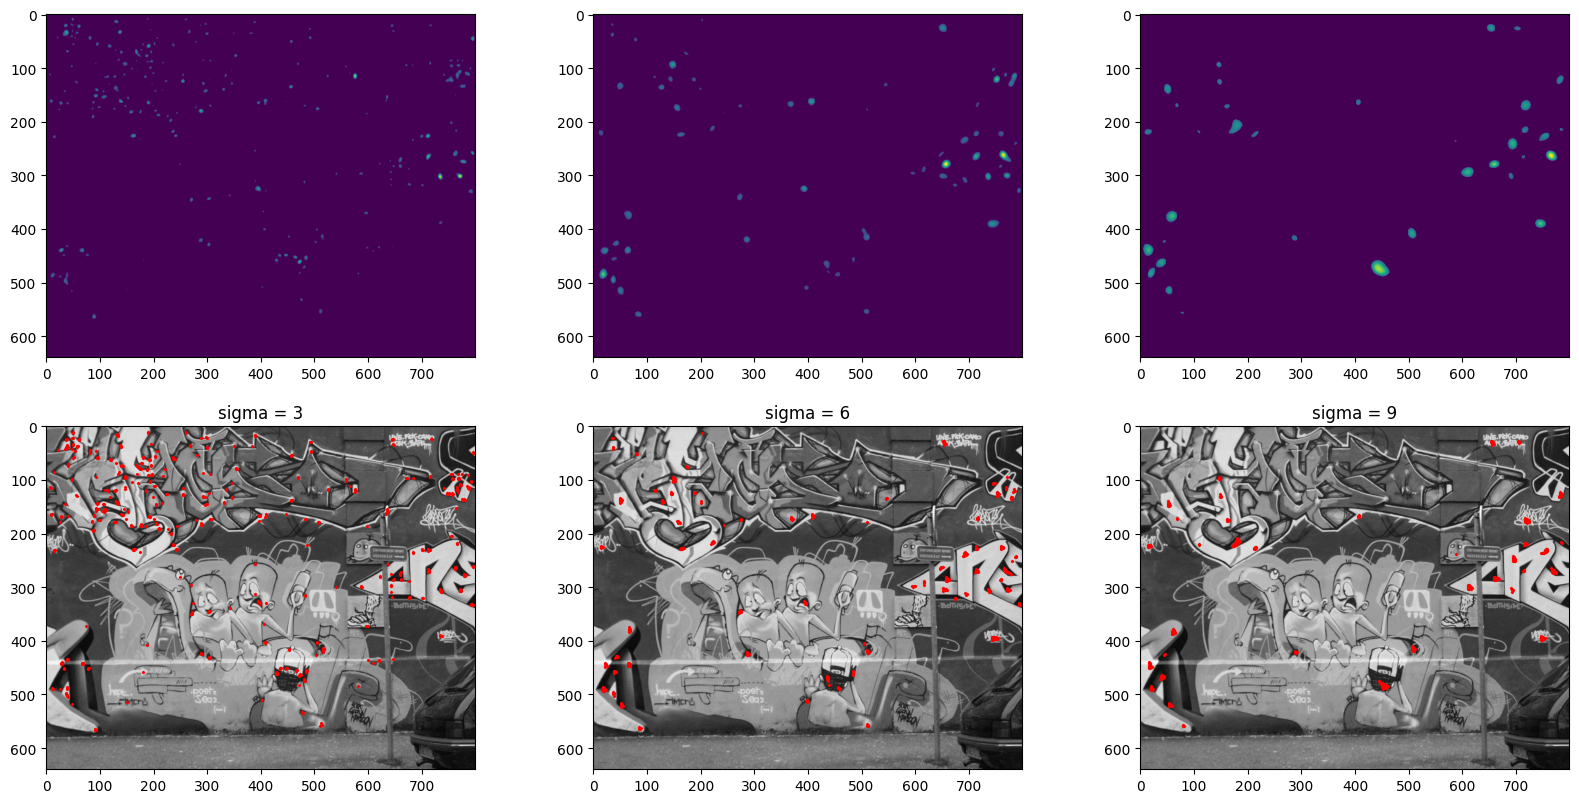

In [50]:
def non_maxima_box(image):
  image = image.copy()
  for i in range(1, len(image)-1):
      for j in range(1, len(image[0])-1):
          neigbours = image[-1+i:i+2, j-1:j+2]
          if image[i, j] < np.max(neigbours):
              image[i, j] = 0
  return image

def hessian_points(image, sigma, treshold):
  I_xx, I_yy, I_xy = get_second_image_derivative(image, sigma)
  det = np.multiply(I_xx, I_yy) - np.square(I_xy)
  det[det<treshold] = 0
  return det

  
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

fig, ax = plt.subplots(2, 3)

for i in range(1,4):
  print(i)
  image = imread_gray("./data/graf/graf_a.jpg")
  test = hessian_points(image, i*3, 0.004)
  det = non_maxima_box(test)
  det[det>0] = 1
  ax[0,i-1].imshow(test)
  ax[1, i-1].imshow(image, cmap="gray")
  ax[1, i-1].scatter(np.where(det != 0)[1], np.where(det != 0)[0], c="red", s=2, marker="x")
  ax[1, i-1].set_title("sigma = " + str(i  * 3))



#### Question: What kind of structures in the image are detected by the algorithm? How does the parameter sigma affect the result?
#### Answer: It detects blobs
